In [1]:
import os
import pickle
import torch
import torchvision
import numpy as np
import pandas as pd
import torch.nn as nn
from PIL import Image
from tqdm import tqdm
import torch.nn as nn
import torch.utils.data as data1
from torch.utils import data
import torch.nn.functional as F
import torchvision.models as models
import matplotlib.pyplot as plt
from torch.autograd import Variable
from sklearn.metrics import accuracy_score
import torchvision.transforms as transforms
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
def split_path(data_path,label = 'orig', transform_path =  '/home/chinmay/datatset/train/'):
    import shutil
    folders = sorted(os.listdir(data_path))
    x = 0
    destination = ''
    for image_name in folders:
        #print(image_name)
        if str(image_name).endswith('0.png'):
            destination = transform_path + label + str(x)+"/"
            os.mkdir(destination)
            print("Changing to ",destination)
            x = x+1 
        shutil.copy2(data_path+image_name,destination)

In [6]:
# This shell should be run once 
# For data preparation
base_dir = '/home/chinmay/datatset/compressed-temp/compressed23_10/train/'
split_path(data_path = base_dir+"original/", label = 'orig', transform_path = '/home/chinmay/datatset/train/') 

--b1Ua-kWJE_0_FZV35miEdyI_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig0/
--b1Ua-kWJE_0_FZV35miEdyI_0_original_input_1.png
--b1Ua-kWJE_0_FZV35miEdyI_0_original_input_2.png
--b1Ua-kWJE_0_FZV35miEdyI_0_original_input_3.png
--b1Ua-kWJE_0_FZV35miEdyI_0_original_input_4.png
--b1Ua-kWJE_0_FZV35miEdyI_0_original_input_5.png
--b1Ua-kWJE_0_FZV35miEdyI_0_original_input_6.png
--b1Ua-kWJE_0_FZV35miEdyI_0_original_input_7.png
--b1Ua-kWJE_0_FZV35miEdyI_0_original_input_8.png
--b1Ua-kWJE_0_FZV35miEdyI_0_original_input_9.png
-2Zdu3hMGVw_1_iHN8A0ZLDU0_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig1/
-2Zdu3hMGVw_1_iHN8A0ZLDU0_0_original_input_1.png
-2Zdu3hMGVw_1_iHN8A0ZLDU0_0_original_input_2.png
-2Zdu3hMGVw_1_iHN8A0ZLDU0_0_original_input_3.png
-2Zdu3hMGVw_1_iHN8A0ZLDU0_0_original_input_4.png
-2Zdu3hMGVw_1_iHN8A0ZLDU0_0_original_input_5.png
-2Zdu3hMGVw_1_iHN8A0ZLDU0_0_original_input_6.png
-2Zdu3hMGVw_1_iHN8A0ZLDU0_0_original_input_7.png
-2Zdu3hMGVw_1_iHN8A0

05HWa6JWOuw_3_DbyhFK5sf2w_0_original_input_9.png
085nRNJXUYk_0_EDcTF0a549E_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig16/
085nRNJXUYk_0_EDcTF0a549E_0_original_input_1.png
085nRNJXUYk_0_EDcTF0a549E_0_original_input_2.png
085nRNJXUYk_0_EDcTF0a549E_0_original_input_3.png
085nRNJXUYk_0_EDcTF0a549E_0_original_input_4.png
085nRNJXUYk_0_EDcTF0a549E_0_original_input_5.png
085nRNJXUYk_0_EDcTF0a549E_0_original_input_6.png
085nRNJXUYk_0_EDcTF0a549E_0_original_input_7.png
085nRNJXUYk_0_EDcTF0a549E_0_original_input_8.png
085nRNJXUYk_0_EDcTF0a549E_0_original_input_9.png
0HH9SA6PtGE_1_F2-rCJ36nao_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig17/
0HH9SA6PtGE_1_F2-rCJ36nao_0_original_input_1.png
0HH9SA6PtGE_1_F2-rCJ36nao_0_original_input_2.png
0HH9SA6PtGE_1_F2-rCJ36nao_0_original_input_3.png
0HH9SA6PtGE_1_F2-rCJ36nao_0_original_input_4.png
0HH9SA6PtGE_1_F2-rCJ36nao_0_original_input_5.png
0HH9SA6PtGE_1_F2-rCJ36nao_0_original_input_6.png
0HH9SA6PtGE_1_F2-r

2JhLsUjRrjg_1_HKm5Ax0EfWg_1_original_input_2.png
2JhLsUjRrjg_1_HKm5Ax0EfWg_1_original_input_3.png
2JhLsUjRrjg_1_HKm5Ax0EfWg_1_original_input_4.png
2JhLsUjRrjg_1_HKm5Ax0EfWg_1_original_input_5.png
2JhLsUjRrjg_1_HKm5Ax0EfWg_1_original_input_6.png
2JhLsUjRrjg_1_HKm5Ax0EfWg_1_original_input_7.png
2JhLsUjRrjg_1_HKm5Ax0EfWg_1_original_input_8.png
2JhLsUjRrjg_1_HKm5Ax0EfWg_1_original_input_9.png
2ThJSdfzX_k_1_E9WhvBtLXvs_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig32/
2ThJSdfzX_k_1_E9WhvBtLXvs_0_original_input_1.png
2ThJSdfzX_k_1_E9WhvBtLXvs_0_original_input_2.png
2ThJSdfzX_k_1_E9WhvBtLXvs_0_original_input_3.png
2ThJSdfzX_k_1_E9WhvBtLXvs_0_original_input_4.png
2ThJSdfzX_k_1_E9WhvBtLXvs_0_original_input_5.png
2ThJSdfzX_k_1_E9WhvBtLXvs_0_original_input_6.png
2ThJSdfzX_k_1_E9WhvBtLXvs_0_original_input_7.png
2ThJSdfzX_k_1_E9WhvBtLXvs_0_original_input_8.png
2ThJSdfzX_k_1_E9WhvBtLXvs_0_original_input_9.png
2VcewGxmq9U_0_lBZ3BR1tbfo_3_original_input_0.png
Changing to  /home/

4CkQn5byAbM_0_8Iq_jpo5inE_1_original_input_9.png
4Jx1f8OYSlQ_0_UH4LOaknTg4_3_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig47/
4Jx1f8OYSlQ_0_UH4LOaknTg4_3_original_input_1.png
4Jx1f8OYSlQ_0_UH4LOaknTg4_3_original_input_2.png
4Jx1f8OYSlQ_0_UH4LOaknTg4_3_original_input_3.png
4Jx1f8OYSlQ_0_UH4LOaknTg4_3_original_input_4.png
4Jx1f8OYSlQ_0_UH4LOaknTg4_3_original_input_5.png
4Jx1f8OYSlQ_0_UH4LOaknTg4_3_original_input_6.png
4Jx1f8OYSlQ_0_UH4LOaknTg4_3_original_input_7.png
4Jx1f8OYSlQ_0_UH4LOaknTg4_3_original_input_8.png
4Jx1f8OYSlQ_0_UH4LOaknTg4_3_original_input_9.png
4j2ALxYvbS8_0_imwcT784F8k_7_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig48/
4j2ALxYvbS8_0_imwcT784F8k_7_original_input_1.png
4j2ALxYvbS8_0_imwcT784F8k_7_original_input_2.png
4j2ALxYvbS8_0_imwcT784F8k_7_original_input_3.png
4j2ALxYvbS8_0_imwcT784F8k_7_original_input_4.png
4j2ALxYvbS8_0_imwcT784F8k_7_original_input_5.png
4j2ALxYvbS8_0_imwcT784F8k_7_original_input_6.png
4j2ALxYvbS8_0_imwc

6DNgGcy4588_0_1ouIl61HXpE_0_original_input_2.png
6DNgGcy4588_0_1ouIl61HXpE_0_original_input_3.png
6DNgGcy4588_0_1ouIl61HXpE_0_original_input_4.png
6DNgGcy4588_0_1ouIl61HXpE_0_original_input_5.png
6DNgGcy4588_0_1ouIl61HXpE_0_original_input_6.png
6DNgGcy4588_0_1ouIl61HXpE_0_original_input_7.png
6DNgGcy4588_0_1ouIl61HXpE_0_original_input_8.png
6DNgGcy4588_0_1ouIl61HXpE_0_original_input_9.png
6W7kF_F0G90_1_2GFsiWW-874_4_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig66/
6W7kF_F0G90_1_2GFsiWW-874_4_original_input_1.png
6W7kF_F0G90_1_2GFsiWW-874_4_original_input_2.png
6W7kF_F0G90_1_2GFsiWW-874_4_original_input_3.png
6W7kF_F0G90_1_2GFsiWW-874_4_original_input_4.png
6W7kF_F0G90_1_2GFsiWW-874_4_original_input_5.png
6W7kF_F0G90_1_2GFsiWW-874_4_original_input_6.png
6W7kF_F0G90_1_2GFsiWW-874_4_original_input_7.png
6W7kF_F0G90_1_2GFsiWW-874_4_original_input_8.png
6W7kF_F0G90_1_2GFsiWW-874_4_original_input_9.png
6W7kF_F0G90_5_C4PPoKRdOTM_4_original_input_0.png
Changing to  /home/

8HJLN_J8KVE_0_555AsOmBUE0_0_original_input_8.png
8HJLN_J8KVE_0_555AsOmBUE0_0_original_input_9.png
8Iq_jpo5inE_1_--b1Ua-kWJE_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig84/
8Iq_jpo5inE_1_--b1Ua-kWJE_0_original_input_1.png
8Iq_jpo5inE_1_--b1Ua-kWJE_0_original_input_2.png
8Iq_jpo5inE_1_--b1Ua-kWJE_0_original_input_3.png
8Iq_jpo5inE_1_--b1Ua-kWJE_0_original_input_4.png
8Iq_jpo5inE_1_--b1Ua-kWJE_0_original_input_5.png
8Iq_jpo5inE_1_--b1Ua-kWJE_0_original_input_6.png
8Iq_jpo5inE_1_--b1Ua-kWJE_0_original_input_7.png
8Iq_jpo5inE_1_--b1Ua-kWJE_0_original_input_8.png
8Iq_jpo5inE_1_--b1Ua-kWJE_0_original_input_9.png
8OqAJkIeMII_0_8ILvKPA3TI0_1_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig85/
8OqAJkIeMII_0_8ILvKPA3TI0_1_original_input_1.png
8OqAJkIeMII_0_8ILvKPA3TI0_1_original_input_2.png
8OqAJkIeMII_0_8ILvKPA3TI0_1_original_input_3.png
8OqAJkIeMII_0_8ILvKPA3TI0_1_original_input_4.png
8OqAJkIeMII_0_8ILvKPA3TI0_1_original_input_5.png
8OqAJkIeMII_0_8ILv

9aYroelpK5I_0_C6g0LMJYAYw_1_original_input_5.png
9aYroelpK5I_0_C6g0LMJYAYw_1_original_input_6.png
9aYroelpK5I_0_C6g0LMJYAYw_1_original_input_7.png
9aYroelpK5I_0_C6g0LMJYAYw_1_original_input_8.png
9aYroelpK5I_0_C6g0LMJYAYw_1_original_input_9.png
9bKbhLtgcNc_2_hz8tDJfT6ZE_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig105/
9bKbhLtgcNc_2_hz8tDJfT6ZE_0_original_input_1.png
9bKbhLtgcNc_2_hz8tDJfT6ZE_0_original_input_2.png
9bKbhLtgcNc_2_hz8tDJfT6ZE_0_original_input_3.png
9bKbhLtgcNc_2_hz8tDJfT6ZE_0_original_input_4.png
9bKbhLtgcNc_2_hz8tDJfT6ZE_0_original_input_5.png
9bKbhLtgcNc_2_hz8tDJfT6ZE_0_original_input_6.png
9bKbhLtgcNc_2_hz8tDJfT6ZE_0_original_input_7.png
9bKbhLtgcNc_2_hz8tDJfT6ZE_0_original_input_8.png
9bKbhLtgcNc_2_hz8tDJfT6ZE_0_original_input_9.png
9jGK1fRtNI0_0_1OHrQ7iIP6I_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig106/
9jGK1fRtNI0_0_1OHrQ7iIP6I_0_original_input_1.png
9jGK1fRtNI0_0_1OHrQ7iIP6I_0_original_input_2.png
9jGK1fRtNI0_0_1O

C4PPoKRdOTM_1_Amk1PGyr3Gc_2_original_input_4.png
C4PPoKRdOTM_1_Amk1PGyr3Gc_2_original_input_5.png
C4PPoKRdOTM_1_Amk1PGyr3Gc_2_original_input_6.png
C4PPoKRdOTM_1_Amk1PGyr3Gc_2_original_input_7.png
C4PPoKRdOTM_1_Amk1PGyr3Gc_2_original_input_8.png
C4PPoKRdOTM_1_Amk1PGyr3Gc_2_original_input_9.png
C4PPoKRdOTM_4_appfHQLqXsE_2_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig128/
C4PPoKRdOTM_4_appfHQLqXsE_2_original_input_1.png
C4PPoKRdOTM_4_appfHQLqXsE_2_original_input_2.png
C4PPoKRdOTM_4_appfHQLqXsE_2_original_input_3.png
C4PPoKRdOTM_4_appfHQLqXsE_2_original_input_4.png
C4PPoKRdOTM_4_appfHQLqXsE_2_original_input_5.png
C4PPoKRdOTM_4_appfHQLqXsE_2_original_input_6.png
C4PPoKRdOTM_4_appfHQLqXsE_2_original_input_7.png
C4PPoKRdOTM_4_appfHQLqXsE_2_original_input_8.png
C4PPoKRdOTM_4_appfHQLqXsE_2_original_input_9.png
C6g0LMJYAYw_1_0YD0xHGFSO0_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig129/
C6g0LMJYAYw_1_0YD0xHGFSO0_0_original_input_1.png
C6g0LMJYAYw_1_0Y

DpPpePzP7h0_3_HG5S_FtTdkU_1_original_input_8.png
DpPpePzP7h0_3_HG5S_FtTdkU_1_original_input_9.png
Dv5jIIGBDLM_8_DNdoVRx9iQc_1_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig145/
Dv5jIIGBDLM_8_DNdoVRx9iQc_1_original_input_1.png
Dv5jIIGBDLM_8_DNdoVRx9iQc_1_original_input_2.png
Dv5jIIGBDLM_8_DNdoVRx9iQc_1_original_input_3.png
Dv5jIIGBDLM_8_DNdoVRx9iQc_1_original_input_4.png
Dv5jIIGBDLM_8_DNdoVRx9iQc_1_original_input_5.png
Dv5jIIGBDLM_8_DNdoVRx9iQc_1_original_input_6.png
Dv5jIIGBDLM_8_DNdoVRx9iQc_1_original_input_7.png
Dv5jIIGBDLM_8_DNdoVRx9iQc_1_original_input_8.png
Dv5jIIGBDLM_8_DNdoVRx9iQc_1_original_input_9.png
DxSGldup4_w_0_8-n1eJ93hLo_1_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig146/
DxSGldup4_w_0_8-n1eJ93hLo_1_original_input_1.png
DxSGldup4_w_0_8-n1eJ93hLo_1_original_input_2.png
DxSGldup4_w_0_8-n1eJ93hLo_1_original_input_3.png
DxSGldup4_w_0_8-n1eJ93hLo_1_original_input_4.png
DxSGldup4_w_0_8-n1eJ93hLo_1_original_input_5.png
DxSGldup4_w_0_8-

FaQVnnWu4Yk_0_6mHtx4slYY0_1_original_input_9.png
FehqXMk0XHQ_1_2a6oWjQ2IxI_1_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig161/
FehqXMk0XHQ_1_2a6oWjQ2IxI_1_original_input_1.png
FehqXMk0XHQ_1_2a6oWjQ2IxI_1_original_input_2.png
FehqXMk0XHQ_1_2a6oWjQ2IxI_1_original_input_3.png
FehqXMk0XHQ_1_2a6oWjQ2IxI_1_original_input_4.png
FehqXMk0XHQ_1_2a6oWjQ2IxI_1_original_input_5.png
FehqXMk0XHQ_1_2a6oWjQ2IxI_1_original_input_6.png
FehqXMk0XHQ_1_2a6oWjQ2IxI_1_original_input_7.png
FehqXMk0XHQ_1_2a6oWjQ2IxI_1_original_input_8.png
FehqXMk0XHQ_1_2a6oWjQ2IxI_1_original_input_9.png
Fg4hl4bmObU_0_FLEukFnxiH4_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig162/
Fg4hl4bmObU_0_FLEukFnxiH4_0_original_input_1.png
Fg4hl4bmObU_0_FLEukFnxiH4_0_original_input_2.png
Fg4hl4bmObU_0_FLEukFnxiH4_0_original_input_3.png
Fg4hl4bmObU_0_FLEukFnxiH4_0_original_input_4.png
Fg4hl4bmObU_0_FLEukFnxiH4_0_original_input_5.png
Fg4hl4bmObU_0_FLEukFnxiH4_0_original_input_6.png
Fg4hl4bmObU_0_FL

Gt5trholJkI_9_AWpblnNeZ1s_6_original_input_1.png
Gt5trholJkI_9_AWpblnNeZ1s_6_original_input_2.png
Gt5trholJkI_9_AWpblnNeZ1s_6_original_input_3.png
Gt5trholJkI_9_AWpblnNeZ1s_6_original_input_4.png
Gt5trholJkI_9_AWpblnNeZ1s_6_original_input_5.png
Gt5trholJkI_9_AWpblnNeZ1s_6_original_input_6.png
Gt5trholJkI_9_AWpblnNeZ1s_6_original_input_7.png
Gt5trholJkI_9_AWpblnNeZ1s_6_original_input_8.png
Gt5trholJkI_9_AWpblnNeZ1s_6_original_input_9.png
GtEdPl82pwo_2_FZV35miEdyI_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig178/
GtEdPl82pwo_2_FZV35miEdyI_0_original_input_1.png
GtEdPl82pwo_2_FZV35miEdyI_0_original_input_2.png
GtEdPl82pwo_2_FZV35miEdyI_0_original_input_3.png
GtEdPl82pwo_2_FZV35miEdyI_0_original_input_4.png
GtEdPl82pwo_2_FZV35miEdyI_0_original_input_5.png
GtEdPl82pwo_2_FZV35miEdyI_0_original_input_6.png
GtEdPl82pwo_2_FZV35miEdyI_0_original_input_7.png
GtEdPl82pwo_2_FZV35miEdyI_0_original_input_8.png
GtEdPl82pwo_2_FZV35miEdyI_0_original_input_9.png
GunF3fefH0M_1_E7Jh

JEjD8iXgGX0_9_WiYH7IxylcE_0_original_input_8.png
JEjD8iXgGX0_9_WiYH7IxylcE_0_original_input_9.png
JKq8DBJkN4g_0_kzMIiQN7cVQ_4_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig202/
JKq8DBJkN4g_0_kzMIiQN7cVQ_4_original_input_1.png
JKq8DBJkN4g_0_kzMIiQN7cVQ_4_original_input_2.png
JKq8DBJkN4g_0_kzMIiQN7cVQ_4_original_input_3.png
JKq8DBJkN4g_0_kzMIiQN7cVQ_4_original_input_4.png
JKq8DBJkN4g_0_kzMIiQN7cVQ_4_original_input_5.png
JKq8DBJkN4g_0_kzMIiQN7cVQ_4_original_input_6.png
JKq8DBJkN4g_0_kzMIiQN7cVQ_4_original_input_7.png
JKq8DBJkN4g_0_kzMIiQN7cVQ_4_original_input_8.png
JKq8DBJkN4g_0_kzMIiQN7cVQ_4_original_input_9.png
JKsfXX792AU_3_nHu86AonGEM_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig203/
JKsfXX792AU_3_nHu86AonGEM_0_original_input_1.png
JKsfXX792AU_3_nHu86AonGEM_0_original_input_2.png
JKsfXX792AU_3_nHu86AonGEM_0_original_input_3.png
JKsfXX792AU_3_nHu86AonGEM_0_original_input_4.png
JKsfXX792AU_3_nHu86AonGEM_0_original_input_5.png
JKsfXX792AU_3_nH

KwNSGKvv5oE_3_Amk1PGyr3Gc_2_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig217/
KwNSGKvv5oE_3_Amk1PGyr3Gc_2_original_input_1.png
KwNSGKvv5oE_3_Amk1PGyr3Gc_2_original_input_2.png
KwNSGKvv5oE_3_Amk1PGyr3Gc_2_original_input_3.png
KwNSGKvv5oE_3_Amk1PGyr3Gc_2_original_input_4.png
KwNSGKvv5oE_3_Amk1PGyr3Gc_2_original_input_5.png
KwNSGKvv5oE_3_Amk1PGyr3Gc_2_original_input_6.png
KwNSGKvv5oE_3_Amk1PGyr3Gc_2_original_input_7.png
KwNSGKvv5oE_3_Amk1PGyr3Gc_2_original_input_8.png
KwNSGKvv5oE_3_Amk1PGyr3Gc_2_original_input_9.png
KzZ9hNuWfAY_4_iX6eJ38E3Rs_5_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig218/
KzZ9hNuWfAY_4_iX6eJ38E3Rs_5_original_input_1.png
KzZ9hNuWfAY_4_iX6eJ38E3Rs_5_original_input_2.png
KzZ9hNuWfAY_4_iX6eJ38E3Rs_5_original_input_3.png
KzZ9hNuWfAY_4_iX6eJ38E3Rs_5_original_input_4.png
KzZ9hNuWfAY_4_iX6eJ38E3Rs_5_original_input_5.png
KzZ9hNuWfAY_4_iX6eJ38E3Rs_5_original_input_6.png
KzZ9hNuWfAY_4_iX6eJ38E3Rs_5_original_input_7.png
KzZ9hNuWfAY_4_iX

O2sTiTYnZfs_1_kzMIiQN7cVQ_8_original_input_1.png
O2sTiTYnZfs_1_kzMIiQN7cVQ_8_original_input_2.png
O2sTiTYnZfs_1_kzMIiQN7cVQ_8_original_input_3.png
O2sTiTYnZfs_1_kzMIiQN7cVQ_8_original_input_4.png
O2sTiTYnZfs_1_kzMIiQN7cVQ_8_original_input_5.png
O2sTiTYnZfs_1_kzMIiQN7cVQ_8_original_input_6.png
O2sTiTYnZfs_1_kzMIiQN7cVQ_8_original_input_7.png
O2sTiTYnZfs_1_kzMIiQN7cVQ_8_original_input_8.png
O2sTiTYnZfs_1_kzMIiQN7cVQ_8_original_input_9.png
OG9L99YWmM8_6_-PMjPTgYiuE_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig239/
OG9L99YWmM8_6_-PMjPTgYiuE_0_original_input_1.png
OG9L99YWmM8_6_-PMjPTgYiuE_0_original_input_2.png
OG9L99YWmM8_6_-PMjPTgYiuE_0_original_input_3.png
OG9L99YWmM8_6_-PMjPTgYiuE_0_original_input_4.png
OG9L99YWmM8_6_-PMjPTgYiuE_0_original_input_5.png
OG9L99YWmM8_6_-PMjPTgYiuE_0_original_input_6.png
OG9L99YWmM8_6_-PMjPTgYiuE_0_original_input_7.png
OG9L99YWmM8_6_-PMjPTgYiuE_0_original_input_8.png
OG9L99YWmM8_6_-PMjPTgYiuE_0_original_input_9.png
ObRlX1pCh_w_2_1MTb

QvNou4BxYEw_1_zE41avx58Fw_1_original_input_8.png
QvNou4BxYEw_1_zE41avx58Fw_1_original_input_9.png
Qw9bdN8sCQM_0_LZccqrB4n2Q_2_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig254/
Qw9bdN8sCQM_0_LZccqrB4n2Q_2_original_input_1.png
Qw9bdN8sCQM_0_LZccqrB4n2Q_2_original_input_2.png
Qw9bdN8sCQM_0_LZccqrB4n2Q_2_original_input_3.png
Qw9bdN8sCQM_0_LZccqrB4n2Q_2_original_input_4.png
Qw9bdN8sCQM_0_LZccqrB4n2Q_2_original_input_5.png
Qw9bdN8sCQM_0_LZccqrB4n2Q_2_original_input_6.png
Qw9bdN8sCQM_0_LZccqrB4n2Q_2_original_input_7.png
Qw9bdN8sCQM_0_LZccqrB4n2Q_2_original_input_8.png
Qw9bdN8sCQM_0_LZccqrB4n2Q_2_original_input_9.png
QyxS5092oNE_1_RRAysUaj2DA_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig255/
QyxS5092oNE_1_RRAysUaj2DA_0_original_input_1.png
QyxS5092oNE_1_RRAysUaj2DA_0_original_input_2.png
QyxS5092oNE_1_RRAysUaj2DA_0_original_input_3.png
QyxS5092oNE_1_RRAysUaj2DA_0_original_input_4.png
QyxS5092oNE_1_RRAysUaj2DA_0_original_input_5.png
QyxS5092oNE_1_RR

VNfRD6fG7Lo_6_W0V8JctnzhI_1_original_input_7.png
VNfRD6fG7Lo_6_W0V8JctnzhI_1_original_input_8.png
VNfRD6fG7Lo_6_W0V8JctnzhI_1_original_input_9.png
VQ6L4_TBrnE_1_R94FhivB5dw_1_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig274/
VQ6L4_TBrnE_1_R94FhivB5dw_1_original_input_1.png
VQ6L4_TBrnE_1_R94FhivB5dw_1_original_input_2.png
VQ6L4_TBrnE_1_R94FhivB5dw_1_original_input_3.png
VQ6L4_TBrnE_1_R94FhivB5dw_1_original_input_4.png
VQ6L4_TBrnE_1_R94FhivB5dw_1_original_input_5.png
VQ6L4_TBrnE_1_R94FhivB5dw_1_original_input_6.png
VQ6L4_TBrnE_1_R94FhivB5dw_1_original_input_7.png
VQ6L4_TBrnE_1_R94FhivB5dw_1_original_input_8.png
VQ6L4_TBrnE_1_R94FhivB5dw_1_original_input_9.png
VhE3cYpl7UM_1_px09hPGfG-Q_2_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig275/
VhE3cYpl7UM_1_px09hPGfG-Q_2_original_input_1.png
VhE3cYpl7UM_1_px09hPGfG-Q_2_original_input_2.png
VhE3cYpl7UM_1_px09hPGfG-Q_2_original_input_3.png
VhE3cYpl7UM_1_px09hPGfG-Q_2_original_input_4.png
VhE3cYpl7UM_1_px

XTpKPHgjBYs_9_um0eoycOmiQ_0_original_input_2.png
XTpKPHgjBYs_9_um0eoycOmiQ_0_original_input_3.png
XTpKPHgjBYs_9_um0eoycOmiQ_0_original_input_4.png
XTpKPHgjBYs_9_um0eoycOmiQ_0_original_input_5.png
XTpKPHgjBYs_9_um0eoycOmiQ_0_original_input_6.png
XTpKPHgjBYs_9_um0eoycOmiQ_0_original_input_7.png
XTpKPHgjBYs_9_um0eoycOmiQ_0_original_input_8.png
XTpKPHgjBYs_9_um0eoycOmiQ_0_original_input_9.png
XaxzjknSwwU_0_Wxo9Yc2M3iw_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig294/
XaxzjknSwwU_0_Wxo9Yc2M3iw_0_original_input_1.png
XaxzjknSwwU_0_Wxo9Yc2M3iw_0_original_input_2.png
XaxzjknSwwU_0_Wxo9Yc2M3iw_0_original_input_3.png
XaxzjknSwwU_0_Wxo9Yc2M3iw_0_original_input_4.png
XaxzjknSwwU_0_Wxo9Yc2M3iw_0_original_input_5.png
XaxzjknSwwU_0_Wxo9Yc2M3iw_0_original_input_6.png
XaxzjknSwwU_0_Wxo9Yc2M3iw_0_original_input_7.png
XaxzjknSwwU_0_Wxo9Yc2M3iw_0_original_input_8.png
XaxzjknSwwU_0_Wxo9Yc2M3iw_0_original_input_9.png
Xt8yDHZ_wNY_0_vYZGBJj7xZA_0_original_input_0.png
Changing to  /home

ZytDJl_emP0_6_ZytDJl_emP0_6_original_input_5.png
ZytDJl_emP0_6_ZytDJl_emP0_6_original_input_6.png
ZytDJl_emP0_6_ZytDJl_emP0_6_original_input_7.png
ZytDJl_emP0_6_ZytDJl_emP0_6_original_input_8.png
ZytDJl_emP0_6_ZytDJl_emP0_6_original_input_9.png
ZzTpJYDc62E_3_lJKODaMl9dM_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig309/
ZzTpJYDc62E_3_lJKODaMl9dM_0_original_input_1.png
ZzTpJYDc62E_3_lJKODaMl9dM_0_original_input_2.png
ZzTpJYDc62E_3_lJKODaMl9dM_0_original_input_3.png
ZzTpJYDc62E_3_lJKODaMl9dM_0_original_input_4.png
ZzTpJYDc62E_3_lJKODaMl9dM_0_original_input_5.png
ZzTpJYDc62E_3_lJKODaMl9dM_0_original_input_6.png
ZzTpJYDc62E_3_lJKODaMl9dM_0_original_input_7.png
ZzTpJYDc62E_3_lJKODaMl9dM_0_original_input_8.png
ZzTpJYDc62E_3_lJKODaMl9dM_0_original_input_9.png
ZzTpJYDc62E_4_QvNou4BxYEw_1_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig310/
ZzTpJYDc62E_4_QvNou4BxYEw_1_original_input_1.png
ZzTpJYDc62E_4_QvNou4BxYEw_1_original_input_2.png
ZzTpJYDc62E_4_Qv

bOZOLDoDFSs_0_gn8Ki_-15_Y_5_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig325/
bOZOLDoDFSs_0_gn8Ki_-15_Y_5_original_input_1.png
bOZOLDoDFSs_0_gn8Ki_-15_Y_5_original_input_2.png
bOZOLDoDFSs_0_gn8Ki_-15_Y_5_original_input_3.png
bOZOLDoDFSs_0_gn8Ki_-15_Y_5_original_input_4.png
bOZOLDoDFSs_0_gn8Ki_-15_Y_5_original_input_5.png
bOZOLDoDFSs_0_gn8Ki_-15_Y_5_original_input_6.png
bOZOLDoDFSs_0_gn8Ki_-15_Y_5_original_input_7.png
bOZOLDoDFSs_0_gn8Ki_-15_Y_5_original_input_8.png
bOZOLDoDFSs_0_gn8Ki_-15_Y_5_original_input_9.png
bbAebmBN4rs_3_1MTbuB2opvM_1_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig326/
bbAebmBN4rs_3_1MTbuB2opvM_1_original_input_1.png
bbAebmBN4rs_3_1MTbuB2opvM_1_original_input_2.png
bbAebmBN4rs_3_1MTbuB2opvM_1_original_input_3.png
bbAebmBN4rs_3_1MTbuB2opvM_1_original_input_4.png
bbAebmBN4rs_3_1MTbuB2opvM_1_original_input_5.png
bbAebmBN4rs_3_1MTbuB2opvM_1_original_input_6.png
bbAebmBN4rs_3_1MTbuB2opvM_1_original_input_7.png
bbAebmBN4rs_3_1M

d9ZKYP2EK5A_0_duRF-5RHGW0_2_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig343/
d9ZKYP2EK5A_0_duRF-5RHGW0_2_original_input_1.png
d9ZKYP2EK5A_0_duRF-5RHGW0_2_original_input_2.png
d9ZKYP2EK5A_0_duRF-5RHGW0_2_original_input_3.png
d9ZKYP2EK5A_0_duRF-5RHGW0_2_original_input_4.png
d9ZKYP2EK5A_0_duRF-5RHGW0_2_original_input_5.png
d9ZKYP2EK5A_0_duRF-5RHGW0_2_original_input_6.png
d9ZKYP2EK5A_0_duRF-5RHGW0_2_original_input_7.png
d9ZKYP2EK5A_0_duRF-5RHGW0_2_original_input_8.png
d9ZKYP2EK5A_0_duRF-5RHGW0_2_original_input_9.png
dD8ijdvmZyM_0_juzG8oEdMUg_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig344/
dD8ijdvmZyM_0_juzG8oEdMUg_0_original_input_1.png
dD8ijdvmZyM_0_juzG8oEdMUg_0_original_input_2.png
dD8ijdvmZyM_0_juzG8oEdMUg_0_original_input_3.png
dD8ijdvmZyM_0_juzG8oEdMUg_0_original_input_4.png
dD8ijdvmZyM_0_juzG8oEdMUg_0_original_input_5.png
dD8ijdvmZyM_0_juzG8oEdMUg_0_original_input_6.png
dD8ijdvmZyM_0_juzG8oEdMUg_0_original_input_7.png
dD8ijdvmZyM_0_ju

eOqzJV7q7SQ_1_pfNHlZ8WkDE_1_original_input_2.png
eOqzJV7q7SQ_1_pfNHlZ8WkDE_1_original_input_3.png
eOqzJV7q7SQ_1_pfNHlZ8WkDE_1_original_input_4.png
eOqzJV7q7SQ_1_pfNHlZ8WkDE_1_original_input_5.png
eOqzJV7q7SQ_1_pfNHlZ8WkDE_1_original_input_6.png
eOqzJV7q7SQ_1_pfNHlZ8WkDE_1_original_input_7.png
eOqzJV7q7SQ_1_pfNHlZ8WkDE_1_original_input_8.png
eOqzJV7q7SQ_1_pfNHlZ8WkDE_1_original_input_9.png
esvC8PN5SoM_0_gLgrBzXsg0k_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig360/
esvC8PN5SoM_0_gLgrBzXsg0k_0_original_input_1.png
esvC8PN5SoM_0_gLgrBzXsg0k_0_original_input_2.png
esvC8PN5SoM_0_gLgrBzXsg0k_0_original_input_3.png
esvC8PN5SoM_0_gLgrBzXsg0k_0_original_input_4.png
esvC8PN5SoM_0_gLgrBzXsg0k_0_original_input_5.png
esvC8PN5SoM_0_gLgrBzXsg0k_0_original_input_6.png
esvC8PN5SoM_0_gLgrBzXsg0k_0_original_input_7.png
esvC8PN5SoM_0_gLgrBzXsg0k_0_original_input_8.png
esvC8PN5SoM_0_gLgrBzXsg0k_0_original_input_9.png
ey5n2B2z8yY_2_6hctJHlc2P0_1_original_input_0.png
Changing to  /home

gZa_zVCtC8I_1_iLfqYcO4XeE_1_original_input_3.png
gZa_zVCtC8I_1_iLfqYcO4XeE_1_original_input_4.png
gZa_zVCtC8I_1_iLfqYcO4XeE_1_original_input_5.png
gZa_zVCtC8I_1_iLfqYcO4XeE_1_original_input_6.png
gZa_zVCtC8I_1_iLfqYcO4XeE_1_original_input_7.png
gZa_zVCtC8I_1_iLfqYcO4XeE_1_original_input_8.png
gZa_zVCtC8I_1_iLfqYcO4XeE_1_original_input_9.png
g_Raf2QR4Ts_0_gxILOss2qM8_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig379/
g_Raf2QR4Ts_0_gxILOss2qM8_0_original_input_1.png
g_Raf2QR4Ts_0_gxILOss2qM8_0_original_input_2.png
g_Raf2QR4Ts_0_gxILOss2qM8_0_original_input_3.png
g_Raf2QR4Ts_0_gxILOss2qM8_0_original_input_4.png
g_Raf2QR4Ts_0_gxILOss2qM8_0_original_input_5.png
g_Raf2QR4Ts_0_gxILOss2qM8_0_original_input_6.png
g_Raf2QR4Ts_0_gxILOss2qM8_0_original_input_7.png
g_Raf2QR4Ts_0_gxILOss2qM8_0_original_input_8.png
g_Raf2QR4Ts_0_gxILOss2qM8_0_original_input_9.png
gbQK8ucIcAw_2_iHN8A0ZLDU0_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig380/
gbQK8ucIcAw_2_iH

ht_ysJELN4Y_0_cAbaHKVog7s_0_original_input_2.png
ht_ysJELN4Y_0_cAbaHKVog7s_0_original_input_3.png
ht_ysJELN4Y_0_cAbaHKVog7s_0_original_input_4.png
ht_ysJELN4Y_0_cAbaHKVog7s_0_original_input_5.png
ht_ysJELN4Y_0_cAbaHKVog7s_0_original_input_6.png
ht_ysJELN4Y_0_cAbaHKVog7s_0_original_input_7.png
ht_ysJELN4Y_0_cAbaHKVog7s_0_original_input_8.png
ht_ysJELN4Y_0_cAbaHKVog7s_0_original_input_9.png
hvz96z8s9_0_0_Pm2rw9hSmm4_2_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig401/
hvz96z8s9_0_0_Pm2rw9hSmm4_2_original_input_1.png
hvz96z8s9_0_0_Pm2rw9hSmm4_2_original_input_2.png
hvz96z8s9_0_0_Pm2rw9hSmm4_2_original_input_3.png
hvz96z8s9_0_0_Pm2rw9hSmm4_2_original_input_4.png
hvz96z8s9_0_0_Pm2rw9hSmm4_2_original_input_5.png
hvz96z8s9_0_0_Pm2rw9hSmm4_2_original_input_6.png
hvz96z8s9_0_0_Pm2rw9hSmm4_2_original_input_7.png
hvz96z8s9_0_0_Pm2rw9hSmm4_2_original_input_8.png
hvz96z8s9_0_0_Pm2rw9hSmm4_2_original_input_9.png
hwNn7VlnczQ_6_atLkFI8Ehvs_0_original_input_0.png
Changing to  /home

jejG-SSlklo_0_hVw5HHXijeg_0_original_input_2.png
jejG-SSlklo_0_hVw5HHXijeg_0_original_input_3.png
jejG-SSlklo_0_hVw5HHXijeg_0_original_input_4.png
jejG-SSlklo_0_hVw5HHXijeg_0_original_input_5.png
jejG-SSlklo_0_hVw5HHXijeg_0_original_input_6.png
jejG-SSlklo_0_hVw5HHXijeg_0_original_input_7.png
jejG-SSlklo_0_hVw5HHXijeg_0_original_input_8.png
jejG-SSlklo_0_hVw5HHXijeg_0_original_input_9.png
jnofZZFF9nY_7_LSbqFFI5umQ_3_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig422/
jnofZZFF9nY_7_LSbqFFI5umQ_3_original_input_1.png
jnofZZFF9nY_7_LSbqFFI5umQ_3_original_input_2.png
jnofZZFF9nY_7_LSbqFFI5umQ_3_original_input_3.png
jnofZZFF9nY_7_LSbqFFI5umQ_3_original_input_4.png
jnofZZFF9nY_7_LSbqFFI5umQ_3_original_input_5.png
jnofZZFF9nY_7_LSbqFFI5umQ_3_original_input_6.png
jnofZZFF9nY_7_LSbqFFI5umQ_3_original_input_7.png
jnofZZFF9nY_7_LSbqFFI5umQ_3_original_input_8.png
jnofZZFF9nY_7_LSbqFFI5umQ_3_original_input_9.png
jnofZZFF9nY_9_dk7BdYp5h3k_3_original_input_0.png
Changing to  /home

kTQEQ-sRVcg_1_8kstheMpWEw_0_original_input_9.png
kT_Pa8UL0-Q_0_kteGC21C9Aw_5_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig438/
kT_Pa8UL0-Q_0_kteGC21C9Aw_5_original_input_1.png
kT_Pa8UL0-Q_0_kteGC21C9Aw_5_original_input_2.png
kT_Pa8UL0-Q_0_kteGC21C9Aw_5_original_input_3.png
kT_Pa8UL0-Q_0_kteGC21C9Aw_5_original_input_4.png
kT_Pa8UL0-Q_0_kteGC21C9Aw_5_original_input_5.png
kT_Pa8UL0-Q_0_kteGC21C9Aw_5_original_input_6.png
kT_Pa8UL0-Q_0_kteGC21C9Aw_5_original_input_7.png
kT_Pa8UL0-Q_0_kteGC21C9Aw_5_original_input_8.png
kT_Pa8UL0-Q_0_kteGC21C9Aw_5_original_input_9.png
kUmXyBm9ksQ_1_kGzwAl0fSCI_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig439/
kUmXyBm9ksQ_1_kGzwAl0fSCI_0_original_input_1.png
kUmXyBm9ksQ_1_kGzwAl0fSCI_0_original_input_2.png
kUmXyBm9ksQ_1_kGzwAl0fSCI_0_original_input_3.png
kUmXyBm9ksQ_1_kGzwAl0fSCI_0_original_input_4.png
kUmXyBm9ksQ_1_kGzwAl0fSCI_0_original_input_5.png
kUmXyBm9ksQ_1_kGzwAl0fSCI_0_original_input_6.png
kUmXyBm9ksQ_1_kG

lJKODaMl9dM_0_-9Gg5zdX7nU_1_original_input_1.png
lJKODaMl9dM_0_-9Gg5zdX7nU_1_original_input_2.png
lJKODaMl9dM_0_-9Gg5zdX7nU_1_original_input_3.png
lJKODaMl9dM_0_-9Gg5zdX7nU_1_original_input_4.png
lJKODaMl9dM_0_-9Gg5zdX7nU_1_original_input_5.png
lJKODaMl9dM_0_-9Gg5zdX7nU_1_original_input_6.png
lJKODaMl9dM_0_-9Gg5zdX7nU_1_original_input_7.png
lJKODaMl9dM_0_-9Gg5zdX7nU_1_original_input_8.png
lJKODaMl9dM_0_-9Gg5zdX7nU_1_original_input_9.png
lJRdnWyHUkA_1_om80E5pOkQM_1_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig457/
lJRdnWyHUkA_1_om80E5pOkQM_1_original_input_1.png
lJRdnWyHUkA_1_om80E5pOkQM_1_original_input_2.png
lJRdnWyHUkA_1_om80E5pOkQM_1_original_input_3.png
lJRdnWyHUkA_1_om80E5pOkQM_1_original_input_4.png
lJRdnWyHUkA_1_om80E5pOkQM_1_original_input_5.png
lJRdnWyHUkA_1_om80E5pOkQM_1_original_input_6.png
lJRdnWyHUkA_1_om80E5pOkQM_1_original_input_7.png
lJRdnWyHUkA_1_om80E5pOkQM_1_original_input_8.png
lJRdnWyHUkA_1_om80E5pOkQM_1_original_input_9.png
lRFGkvACXt0_2_mLkE

mW-aDFm2w_k_0_Un5QIB0wQ-k_1_original_input_1.png
mW-aDFm2w_k_0_Un5QIB0wQ-k_1_original_input_2.png
mW-aDFm2w_k_0_Un5QIB0wQ-k_1_original_input_3.png
mW-aDFm2w_k_0_Un5QIB0wQ-k_1_original_input_4.png
mW-aDFm2w_k_0_Un5QIB0wQ-k_1_original_input_5.png
mW-aDFm2w_k_0_Un5QIB0wQ-k_1_original_input_6.png
mW-aDFm2w_k_0_Un5QIB0wQ-k_1_original_input_7.png
mW-aDFm2w_k_0_Un5QIB0wQ-k_1_original_input_8.png
mW-aDFm2w_k_0_Un5QIB0wQ-k_1_original_input_9.png
mWorbwq7tGI_0_mLkET5LSFTE_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig475/
mWorbwq7tGI_0_mLkET5LSFTE_0_original_input_1.png
mWorbwq7tGI_0_mLkET5LSFTE_0_original_input_2.png
mWorbwq7tGI_0_mLkET5LSFTE_0_original_input_3.png
mWorbwq7tGI_0_mLkET5LSFTE_0_original_input_4.png
mWorbwq7tGI_0_mLkET5LSFTE_0_original_input_5.png
mWorbwq7tGI_0_mLkET5LSFTE_0_original_input_6.png
mWorbwq7tGI_0_mLkET5LSFTE_0_original_input_7.png
mWorbwq7tGI_0_mLkET5LSFTE_0_original_input_8.png
mWorbwq7tGI_0_mLkET5LSFTE_0_original_input_9.png
mlJ64nVPKsM_5_lJRd

nZ0W1dge0Eg_2_kT_Pa8UL0-Q_0_original_input_7.png
nZ0W1dge0Eg_2_kT_Pa8UL0-Q_0_original_input_8.png
nZ0W1dge0Eg_2_kT_Pa8UL0-Q_0_original_input_9.png
nfU4JIaKll4_0_p9KWUF4GY9w_3_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig491/
nfU4JIaKll4_0_p9KWUF4GY9w_3_original_input_1.png
nfU4JIaKll4_0_p9KWUF4GY9w_3_original_input_2.png
nfU4JIaKll4_0_p9KWUF4GY9w_3_original_input_3.png
nfU4JIaKll4_0_p9KWUF4GY9w_3_original_input_4.png
nfU4JIaKll4_0_p9KWUF4GY9w_3_original_input_5.png
nfU4JIaKll4_0_p9KWUF4GY9w_3_original_input_6.png
nfU4JIaKll4_0_p9KWUF4GY9w_3_original_input_7.png
nfU4JIaKll4_0_p9KWUF4GY9w_3_original_input_8.png
nfU4JIaKll4_0_p9KWUF4GY9w_3_original_input_9.png
nh03PB73iiw_0_nsx16uS4DzU_6_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig492/
nh03PB73iiw_0_nsx16uS4DzU_6_original_input_1.png
nh03PB73iiw_0_nsx16uS4DzU_6_original_input_2.png
nh03PB73iiw_0_nsx16uS4DzU_6_original_input_3.png
nh03PB73iiw_0_nsx16uS4DzU_6_original_input_4.png
nh03PB73iiw_0_ns

Changing to  /home/chinmay/datatset/train/orig506/
oAHHbpD_uN8_0_XGyvkLyrs1o_0_original_input_1.png
oAHHbpD_uN8_0_XGyvkLyrs1o_0_original_input_2.png
oAHHbpD_uN8_0_XGyvkLyrs1o_0_original_input_3.png
oAHHbpD_uN8_0_XGyvkLyrs1o_0_original_input_4.png
oAHHbpD_uN8_0_XGyvkLyrs1o_0_original_input_5.png
oAHHbpD_uN8_0_XGyvkLyrs1o_0_original_input_6.png
oAHHbpD_uN8_0_XGyvkLyrs1o_0_original_input_7.png
oAHHbpD_uN8_0_XGyvkLyrs1o_0_original_input_8.png
oAHHbpD_uN8_0_XGyvkLyrs1o_0_original_input_9.png
oC_LIDt4rV0_0_iuV6g_AP3Oo_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig507/
oC_LIDt4rV0_0_iuV6g_AP3Oo_0_original_input_1.png
oC_LIDt4rV0_0_iuV6g_AP3Oo_0_original_input_2.png
oC_LIDt4rV0_0_iuV6g_AP3Oo_0_original_input_3.png
oC_LIDt4rV0_0_iuV6g_AP3Oo_0_original_input_4.png
oC_LIDt4rV0_0_iuV6g_AP3Oo_0_original_input_5.png
oC_LIDt4rV0_0_iuV6g_AP3Oo_0_original_input_6.png
oC_LIDt4rV0_0_iuV6g_AP3Oo_0_original_input_7.png
oC_LIDt4rV0_0_iuV6g_AP3Oo_0_original_input_8.png
oC_LIDt4rV0_0_iu

pbgRanB-Nfo_1_q3TBk7wt6zM_5_original_input_2.png
pbgRanB-Nfo_1_q3TBk7wt6zM_5_original_input_3.png
pbgRanB-Nfo_1_q3TBk7wt6zM_5_original_input_4.png
pbgRanB-Nfo_1_q3TBk7wt6zM_5_original_input_5.png
pbgRanB-Nfo_1_q3TBk7wt6zM_5_original_input_6.png
pbgRanB-Nfo_1_q3TBk7wt6zM_5_original_input_7.png
pbgRanB-Nfo_1_q3TBk7wt6zM_5_original_input_8.png
pbgRanB-Nfo_1_q3TBk7wt6zM_5_original_input_9.png
pd8-LGKVGWQ_0_pXJ6HOsm_iY_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig524/
pd8-LGKVGWQ_0_pXJ6HOsm_iY_0_original_input_1.png
pd8-LGKVGWQ_0_pXJ6HOsm_iY_0_original_input_2.png
pd8-LGKVGWQ_0_pXJ6HOsm_iY_0_original_input_3.png
pd8-LGKVGWQ_0_pXJ6HOsm_iY_0_original_input_4.png
pd8-LGKVGWQ_0_pXJ6HOsm_iY_0_original_input_5.png
pd8-LGKVGWQ_0_pXJ6HOsm_iY_0_original_input_6.png
pd8-LGKVGWQ_0_pXJ6HOsm_iY_0_original_input_7.png
pd8-LGKVGWQ_0_pXJ6HOsm_iY_0_original_input_8.png
pd8-LGKVGWQ_0_pXJ6HOsm_iY_0_original_input_9.png
pd8-LGKVGWQ_1_rIiQLEa8iZ0_0_original_input_0.png
Changing to  /home

qQdPwpjWbkY_0_qqvLTSOwm8M_0_original_input_7.png
qQdPwpjWbkY_0_qqvLTSOwm8M_0_original_input_8.png
qQdPwpjWbkY_0_qqvLTSOwm8M_0_original_input_9.png
qYTsvPWW710_0_r7B491zbxnw_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig541/
qYTsvPWW710_0_r7B491zbxnw_0_original_input_1.png
qYTsvPWW710_0_r7B491zbxnw_0_original_input_2.png
qYTsvPWW710_0_r7B491zbxnw_0_original_input_3.png
qYTsvPWW710_0_r7B491zbxnw_0_original_input_4.png
qYTsvPWW710_0_r7B491zbxnw_0_original_input_5.png
qYTsvPWW710_0_r7B491zbxnw_0_original_input_6.png
qYTsvPWW710_0_r7B491zbxnw_0_original_input_7.png
qYTsvPWW710_0_r7B491zbxnw_0_original_input_8.png
qYTsvPWW710_0_r7B491zbxnw_0_original_input_9.png
q_OD0ZA4y6g_0_px09hPGfG-Q_5_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig542/
q_OD0ZA4y6g_0_px09hPGfG-Q_5_original_input_1.png
q_OD0ZA4y6g_0_px09hPGfG-Q_5_original_input_2.png
q_OD0ZA4y6g_0_px09hPGfG-Q_5_original_input_3.png
q_OD0ZA4y6g_0_px09hPGfG-Q_5_original_input_4.png
q_OD0ZA4y6g_0_px

rI7GbgEhwoY_1_qQdPwpjWbkY_0_original_input_6.png
rI7GbgEhwoY_1_qQdPwpjWbkY_0_original_input_7.png
rI7GbgEhwoY_1_qQdPwpjWbkY_0_original_input_8.png
rI7GbgEhwoY_1_qQdPwpjWbkY_0_original_input_9.png
rJPM8EdWShs_0_4j2ALxYvbS8_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig558/
rJPM8EdWShs_0_4j2ALxYvbS8_0_original_input_1.png
rJPM8EdWShs_0_4j2ALxYvbS8_0_original_input_2.png
rJPM8EdWShs_0_4j2ALxYvbS8_0_original_input_3.png
rJPM8EdWShs_0_4j2ALxYvbS8_0_original_input_4.png
rJPM8EdWShs_0_4j2ALxYvbS8_0_original_input_5.png
rJPM8EdWShs_0_4j2ALxYvbS8_0_original_input_6.png
rJPM8EdWShs_0_4j2ALxYvbS8_0_original_input_7.png
rJPM8EdWShs_0_4j2ALxYvbS8_0_original_input_8.png
rJPM8EdWShs_0_4j2ALxYvbS8_0_original_input_9.png
rJPM8EdWShs_1_qg6XbzKSbBQ_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig559/
rJPM8EdWShs_1_qg6XbzKSbBQ_0_original_input_1.png
rJPM8EdWShs_1_qg6XbzKSbBQ_0_original_input_2.png
rJPM8EdWShs_1_qg6XbzKSbBQ_0_original_input_3.png
rJPM8EdWShs_1_qg

saQyF1FPiqw_0_sZqIjquRfck_8_original_input_1.png
saQyF1FPiqw_0_sZqIjquRfck_8_original_input_2.png
saQyF1FPiqw_0_sZqIjquRfck_8_original_input_3.png
saQyF1FPiqw_0_sZqIjquRfck_8_original_input_4.png
saQyF1FPiqw_0_sZqIjquRfck_8_original_input_5.png
saQyF1FPiqw_0_sZqIjquRfck_8_original_input_6.png
saQyF1FPiqw_0_sZqIjquRfck_8_original_input_7.png
saQyF1FPiqw_0_sZqIjquRfck_8_original_input_8.png
saQyF1FPiqw_0_sZqIjquRfck_8_original_input_9.png
sgZR7AuDorQ_3_rRZrp13w7ic_1_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig577/
sgZR7AuDorQ_3_rRZrp13w7ic_1_original_input_1.png
sgZR7AuDorQ_3_rRZrp13w7ic_1_original_input_2.png
sgZR7AuDorQ_3_rRZrp13w7ic_1_original_input_3.png
sgZR7AuDorQ_3_rRZrp13w7ic_1_original_input_4.png
sgZR7AuDorQ_3_rRZrp13w7ic_1_original_input_5.png
sgZR7AuDorQ_3_rRZrp13w7ic_1_original_input_6.png
sgZR7AuDorQ_3_rRZrp13w7ic_1_original_input_7.png
sgZR7AuDorQ_3_rRZrp13w7ic_1_original_input_8.png
sgZR7AuDorQ_3_rRZrp13w7ic_1_original_input_9.png
sjTxzMFOey8_5_Xaxz

u7tnUA1rdDw_0_ZytDJl_emP0_6_original_input_1.png
u7tnUA1rdDw_0_ZytDJl_emP0_6_original_input_2.png
u7tnUA1rdDw_0_ZytDJl_emP0_6_original_input_3.png
u7tnUA1rdDw_0_ZytDJl_emP0_6_original_input_4.png
u7tnUA1rdDw_0_ZytDJl_emP0_6_original_input_5.png
u7tnUA1rdDw_0_ZytDJl_emP0_6_original_input_6.png
u7tnUA1rdDw_0_ZytDJl_emP0_6_original_input_7.png
u7tnUA1rdDw_0_ZytDJl_emP0_6_original_input_8.png
u7tnUA1rdDw_0_ZytDJl_emP0_6_original_input_9.png
u7tnUA1rdDw_6_vRyZGkbKyI4_1_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig596/
u7tnUA1rdDw_6_vRyZGkbKyI4_1_original_input_1.png
u7tnUA1rdDw_6_vRyZGkbKyI4_1_original_input_2.png
u7tnUA1rdDw_6_vRyZGkbKyI4_1_original_input_3.png
u7tnUA1rdDw_6_vRyZGkbKyI4_1_original_input_4.png
u7tnUA1rdDw_6_vRyZGkbKyI4_1_original_input_5.png
u7tnUA1rdDw_6_vRyZGkbKyI4_1_original_input_6.png
u7tnUA1rdDw_6_vRyZGkbKyI4_1_original_input_7.png
u7tnUA1rdDw_6_vRyZGkbKyI4_1_original_input_8.png
u7tnUA1rdDw_6_vRyZGkbKyI4_1_original_input_9.png
u7tnUA1rdDw_8_uENB

vBrDiz59eas_1_oAr4DcgeTto_2_original_input_8.png
vBrDiz59eas_1_oAr4DcgeTto_2_original_input_9.png
vRyZGkbKyI4_1_uPXMOO1EiN0_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig611/
vRyZGkbKyI4_1_uPXMOO1EiN0_0_original_input_1.png
vRyZGkbKyI4_1_uPXMOO1EiN0_0_original_input_2.png
vRyZGkbKyI4_1_uPXMOO1EiN0_0_original_input_3.png
vRyZGkbKyI4_1_uPXMOO1EiN0_0_original_input_4.png
vRyZGkbKyI4_1_uPXMOO1EiN0_0_original_input_5.png
vRyZGkbKyI4_1_uPXMOO1EiN0_0_original_input_6.png
vRyZGkbKyI4_1_uPXMOO1EiN0_0_original_input_7.png
vRyZGkbKyI4_1_uPXMOO1EiN0_0_original_input_8.png
vRyZGkbKyI4_1_uPXMOO1EiN0_0_original_input_9.png
vRyZGkbKyI4_2_vcdcGKDA2ys_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig612/
vRyZGkbKyI4_2_vcdcGKDA2ys_0_original_input_1.png
vRyZGkbKyI4_2_vcdcGKDA2ys_0_original_input_2.png
vRyZGkbKyI4_2_vcdcGKDA2ys_0_original_input_3.png
vRyZGkbKyI4_2_vcdcGKDA2ys_0_original_input_4.png
vRyZGkbKyI4_2_vcdcGKDA2ys_0_original_input_5.png
vRyZGkbKyI4_2_vc

xJwHH4yVaYs_0_riakMXEjekA_0_original_input_7.png
xJwHH4yVaYs_0_riakMXEjekA_0_original_input_8.png
xJwHH4yVaYs_0_riakMXEjekA_0_original_input_9.png
xPv2ypSbhco_1_p9KWUF4GY9w_3_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig629/
xPv2ypSbhco_1_p9KWUF4GY9w_3_original_input_1.png
xPv2ypSbhco_1_p9KWUF4GY9w_3_original_input_2.png
xPv2ypSbhco_1_p9KWUF4GY9w_3_original_input_3.png
xPv2ypSbhco_1_p9KWUF4GY9w_3_original_input_4.png
xPv2ypSbhco_1_p9KWUF4GY9w_3_original_input_5.png
xPv2ypSbhco_1_p9KWUF4GY9w_3_original_input_6.png
xPv2ypSbhco_1_p9KWUF4GY9w_3_original_input_7.png
xPv2ypSbhco_1_p9KWUF4GY9w_3_original_input_8.png
xPv2ypSbhco_1_p9KWUF4GY9w_3_original_input_9.png
xQi1olDt7oo_4_NA9U0oHjAL8_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig630/
xQi1olDt7oo_4_NA9U0oHjAL8_0_original_input_1.png
xQi1olDt7oo_4_NA9U0oHjAL8_0_original_input_2.png
xQi1olDt7oo_4_NA9U0oHjAL8_0_original_input_3.png
xQi1olDt7oo_4_NA9U0oHjAL8_0_original_input_4.png
xQi1olDt7oo_4_NA

y1uIt39-154_2_xffuIgiRUZw_6_original_input_2.png
y1uIt39-154_2_xffuIgiRUZw_6_original_input_3.png
y1uIt39-154_2_xffuIgiRUZw_6_original_input_4.png
y1uIt39-154_2_xffuIgiRUZw_6_original_input_5.png
y1uIt39-154_2_xffuIgiRUZw_6_original_input_6.png
y1uIt39-154_2_xffuIgiRUZw_6_original_input_7.png
y1uIt39-154_2_xffuIgiRUZw_6_original_input_8.png
y1uIt39-154_2_xffuIgiRUZw_6_original_input_9.png
y2hDXi4Dt5k_0_ZzTpJYDc62E_3_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig645/
y2hDXi4Dt5k_0_ZzTpJYDc62E_3_original_input_1.png
y2hDXi4Dt5k_0_ZzTpJYDc62E_3_original_input_2.png
y2hDXi4Dt5k_0_ZzTpJYDc62E_3_original_input_3.png
y2hDXi4Dt5k_0_ZzTpJYDc62E_3_original_input_4.png
y2hDXi4Dt5k_0_ZzTpJYDc62E_3_original_input_5.png
y2hDXi4Dt5k_0_ZzTpJYDc62E_3_original_input_6.png
y2hDXi4Dt5k_0_ZzTpJYDc62E_3_original_input_7.png
y2hDXi4Dt5k_0_ZzTpJYDc62E_3_original_input_8.png
y2hDXi4Dt5k_0_ZzTpJYDc62E_3_original_input_9.png
y4PqkuhOzNc_1_xjz-aRpylBg_0_original_input_0.png
Changing to  /home

yrkevMmkVMU_4_yjsNEL7DQuY_3_original_input_1.png
yrkevMmkVMU_4_yjsNEL7DQuY_3_original_input_2.png
yrkevMmkVMU_4_yjsNEL7DQuY_3_original_input_3.png
yrkevMmkVMU_4_yjsNEL7DQuY_3_original_input_4.png
yrkevMmkVMU_4_yjsNEL7DQuY_3_original_input_5.png
yrkevMmkVMU_4_yjsNEL7DQuY_3_original_input_6.png
yrkevMmkVMU_4_yjsNEL7DQuY_3_original_input_7.png
yrkevMmkVMU_4_yjsNEL7DQuY_3_original_input_8.png
yrkevMmkVMU_4_yjsNEL7DQuY_3_original_input_9.png
ysNczfg7n8w_0_xAJOrJ0QbJE_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig665/
ysNczfg7n8w_0_xAJOrJ0QbJE_0_original_input_1.png
ysNczfg7n8w_0_xAJOrJ0QbJE_0_original_input_2.png
ysNczfg7n8w_0_xAJOrJ0QbJE_0_original_input_3.png
ysNczfg7n8w_0_xAJOrJ0QbJE_0_original_input_4.png
ysNczfg7n8w_0_xAJOrJ0QbJE_0_original_input_5.png
ysNczfg7n8w_0_xAJOrJ0QbJE_0_original_input_6.png
ysNczfg7n8w_0_xAJOrJ0QbJE_0_original_input_7.png
ysNczfg7n8w_0_xAJOrJ0QbJE_0_original_input_8.png
ysNczfg7n8w_0_xAJOrJ0QbJE_0_original_input_9.png
ysNczfg7n8w_1_yyMF

z4yTbtJTlE0_4_zIowgsPebcE_4_original_input_3.png
z4yTbtJTlE0_4_zIowgsPebcE_4_original_input_4.png
z4yTbtJTlE0_4_zIowgsPebcE_4_original_input_5.png
z4yTbtJTlE0_4_zIowgsPebcE_4_original_input_6.png
z4yTbtJTlE0_4_zIowgsPebcE_4_original_input_7.png
z4yTbtJTlE0_4_zIowgsPebcE_4_original_input_8.png
z4yTbtJTlE0_4_zIowgsPebcE_4_original_input_9.png
z9kvKAg_uTQ_2_RBTDZo0IqmA_3_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig682/
z9kvKAg_uTQ_2_RBTDZo0IqmA_3_original_input_1.png
z9kvKAg_uTQ_2_RBTDZo0IqmA_3_original_input_2.png
z9kvKAg_uTQ_2_RBTDZo0IqmA_3_original_input_3.png
z9kvKAg_uTQ_2_RBTDZo0IqmA_3_original_input_4.png
z9kvKAg_uTQ_2_RBTDZo0IqmA_3_original_input_5.png
z9kvKAg_uTQ_2_RBTDZo0IqmA_3_original_input_6.png
z9kvKAg_uTQ_2_RBTDZo0IqmA_3_original_input_7.png
z9kvKAg_uTQ_2_RBTDZo0IqmA_3_original_input_8.png
z9kvKAg_uTQ_2_RBTDZo0IqmA_3_original_input_9.png
z9kvKAg_uTQ_3_z4JTpNL3Wxs_0_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig683/
z9kvKAg_uTQ_3_z4

ze1aB8sjnvY_0_zBfz_P3H0y8_2_original_input_2.png
ze1aB8sjnvY_0_zBfz_P3H0y8_2_original_input_3.png
ze1aB8sjnvY_0_zBfz_P3H0y8_2_original_input_4.png
ze1aB8sjnvY_0_zBfz_P3H0y8_2_original_input_5.png
ze1aB8sjnvY_0_zBfz_P3H0y8_2_original_input_6.png
ze1aB8sjnvY_0_zBfz_P3H0y8_2_original_input_7.png
ze1aB8sjnvY_0_zBfz_P3H0y8_2_original_input_8.png
ze1aB8sjnvY_0_zBfz_P3H0y8_2_original_input_9.png
ze1aB8sjnvY_1_zikCgga8LFM_1_original_input_0.png
Changing to  /home/chinmay/datatset/train/orig702/
ze1aB8sjnvY_1_zikCgga8LFM_1_original_input_1.png
ze1aB8sjnvY_1_zikCgga8LFM_1_original_input_2.png
ze1aB8sjnvY_1_zikCgga8LFM_1_original_input_3.png
ze1aB8sjnvY_1_zikCgga8LFM_1_original_input_4.png
ze1aB8sjnvY_1_zikCgga8LFM_1_original_input_5.png
ze1aB8sjnvY_1_zikCgga8LFM_1_original_input_6.png
ze1aB8sjnvY_1_zikCgga8LFM_1_original_input_7.png
ze1aB8sjnvY_1_zikCgga8LFM_1_original_input_8.png
ze1aB8sjnvY_1_zikCgga8LFM_1_original_input_9.png
zgkHFG3upQ0_3_zhTB2vLokXg_3_original_input_0.png
Changing to  /home

In [8]:
# Run this once for generating train data- this puts altered frames
# 10 frames per folder
split_path(data_path = base_dir+"altered/", label = 'alt', transform_path = '/home/chinmay/datatset/train/') 

Changing to  /home/chinmay/datatset/train/alt0/
Changing to  /home/chinmay/datatset/train/alt1/
Changing to  /home/chinmay/datatset/train/alt2/
Changing to  /home/chinmay/datatset/train/alt3/
Changing to  /home/chinmay/datatset/train/alt4/
Changing to  /home/chinmay/datatset/train/alt5/
Changing to  /home/chinmay/datatset/train/alt6/
Changing to  /home/chinmay/datatset/train/alt7/
Changing to  /home/chinmay/datatset/train/alt8/
Changing to  /home/chinmay/datatset/train/alt9/
Changing to  /home/chinmay/datatset/train/alt10/
Changing to  /home/chinmay/datatset/train/alt11/
Changing to  /home/chinmay/datatset/train/alt12/
Changing to  /home/chinmay/datatset/train/alt13/
Changing to  /home/chinmay/datatset/train/alt14/
Changing to  /home/chinmay/datatset/train/alt15/
Changing to  /home/chinmay/datatset/train/alt16/
Changing to  /home/chinmay/datatset/train/alt17/
Changing to  /home/chinmay/datatset/train/alt18/
Changing to  /home/chinmay/datatset/train/alt19/
Changing to  /home/chinmay/dat

Changing to  /home/chinmay/datatset/train/alt175/
Changing to  /home/chinmay/datatset/train/alt176/
Changing to  /home/chinmay/datatset/train/alt177/
Changing to  /home/chinmay/datatset/train/alt178/
Changing to  /home/chinmay/datatset/train/alt179/
Changing to  /home/chinmay/datatset/train/alt180/
Changing to  /home/chinmay/datatset/train/alt181/
Changing to  /home/chinmay/datatset/train/alt182/
Changing to  /home/chinmay/datatset/train/alt183/
Changing to  /home/chinmay/datatset/train/alt184/
Changing to  /home/chinmay/datatset/train/alt185/
Changing to  /home/chinmay/datatset/train/alt186/
Changing to  /home/chinmay/datatset/train/alt187/
Changing to  /home/chinmay/datatset/train/alt188/
Changing to  /home/chinmay/datatset/train/alt189/
Changing to  /home/chinmay/datatset/train/alt190/
Changing to  /home/chinmay/datatset/train/alt191/
Changing to  /home/chinmay/datatset/train/alt192/
Changing to  /home/chinmay/datatset/train/alt193/
Changing to  /home/chinmay/datatset/train/alt194/


Changing to  /home/chinmay/datatset/train/alt344/
Changing to  /home/chinmay/datatset/train/alt345/
Changing to  /home/chinmay/datatset/train/alt346/
Changing to  /home/chinmay/datatset/train/alt347/
Changing to  /home/chinmay/datatset/train/alt348/
Changing to  /home/chinmay/datatset/train/alt349/
Changing to  /home/chinmay/datatset/train/alt350/
Changing to  /home/chinmay/datatset/train/alt351/
Changing to  /home/chinmay/datatset/train/alt352/
Changing to  /home/chinmay/datatset/train/alt353/
Changing to  /home/chinmay/datatset/train/alt354/
Changing to  /home/chinmay/datatset/train/alt355/
Changing to  /home/chinmay/datatset/train/alt356/
Changing to  /home/chinmay/datatset/train/alt357/
Changing to  /home/chinmay/datatset/train/alt358/
Changing to  /home/chinmay/datatset/train/alt359/
Changing to  /home/chinmay/datatset/train/alt360/
Changing to  /home/chinmay/datatset/train/alt361/
Changing to  /home/chinmay/datatset/train/alt362/
Changing to  /home/chinmay/datatset/train/alt363/


Changing to  /home/chinmay/datatset/train/alt508/
Changing to  /home/chinmay/datatset/train/alt509/
Changing to  /home/chinmay/datatset/train/alt510/
Changing to  /home/chinmay/datatset/train/alt511/
Changing to  /home/chinmay/datatset/train/alt512/
Changing to  /home/chinmay/datatset/train/alt513/
Changing to  /home/chinmay/datatset/train/alt514/
Changing to  /home/chinmay/datatset/train/alt515/
Changing to  /home/chinmay/datatset/train/alt516/
Changing to  /home/chinmay/datatset/train/alt517/
Changing to  /home/chinmay/datatset/train/alt518/
Changing to  /home/chinmay/datatset/train/alt519/
Changing to  /home/chinmay/datatset/train/alt520/
Changing to  /home/chinmay/datatset/train/alt521/
Changing to  /home/chinmay/datatset/train/alt522/
Changing to  /home/chinmay/datatset/train/alt523/
Changing to  /home/chinmay/datatset/train/alt524/
Changing to  /home/chinmay/datatset/train/alt525/
Changing to  /home/chinmay/datatset/train/alt526/
Changing to  /home/chinmay/datatset/train/alt527/


Changing to  /home/chinmay/datatset/train/alt678/
Changing to  /home/chinmay/datatset/train/alt679/
Changing to  /home/chinmay/datatset/train/alt680/
Changing to  /home/chinmay/datatset/train/alt681/
Changing to  /home/chinmay/datatset/train/alt682/
Changing to  /home/chinmay/datatset/train/alt683/
Changing to  /home/chinmay/datatset/train/alt684/
Changing to  /home/chinmay/datatset/train/alt685/
Changing to  /home/chinmay/datatset/train/alt686/
Changing to  /home/chinmay/datatset/train/alt687/
Changing to  /home/chinmay/datatset/train/alt688/
Changing to  /home/chinmay/datatset/train/alt689/
Changing to  /home/chinmay/datatset/train/alt690/
Changing to  /home/chinmay/datatset/train/alt691/
Changing to  /home/chinmay/datatset/train/alt692/
Changing to  /home/chinmay/datatset/train/alt693/
Changing to  /home/chinmay/datatset/train/alt694/
Changing to  /home/chinmay/datatset/train/alt695/
Changing to  /home/chinmay/datatset/train/alt696/
Changing to  /home/chinmay/datatset/train/alt697/


In [10]:
base_dir = '/home/chinmay/datatset/compressed-temp/compressed23_10/val/'
split_path(data_path = base_dir+"original/", label = 'orig', transform_path = '/home/chinmay/datatset/val/') 

Changing to  /home/chinmay/datatset/val/orig0/
Changing to  /home/chinmay/datatset/val/orig1/
Changing to  /home/chinmay/datatset/val/orig2/
Changing to  /home/chinmay/datatset/val/orig3/
Changing to  /home/chinmay/datatset/val/orig4/
Changing to  /home/chinmay/datatset/val/orig5/
Changing to  /home/chinmay/datatset/val/orig6/
Changing to  /home/chinmay/datatset/val/orig7/
Changing to  /home/chinmay/datatset/val/orig8/
Changing to  /home/chinmay/datatset/val/orig9/
Changing to  /home/chinmay/datatset/val/orig10/
Changing to  /home/chinmay/datatset/val/orig11/
Changing to  /home/chinmay/datatset/val/orig12/
Changing to  /home/chinmay/datatset/val/orig13/
Changing to  /home/chinmay/datatset/val/orig14/
Changing to  /home/chinmay/datatset/val/orig15/
Changing to  /home/chinmay/datatset/val/orig16/
Changing to  /home/chinmay/datatset/val/orig17/
Changing to  /home/chinmay/datatset/val/orig18/
Changing to  /home/chinmay/datatset/val/orig19/
Changing to  /home/chinmay/datatset/val/orig20/
Ch

In [13]:
split_path(data_path = base_dir+"altered/", label = 'alt', transform_path = '/home/chinmay/datatset/val/') 

Changing to  /home/chinmay/datatset/val/alt0/
Changing to  /home/chinmay/datatset/val/alt1/
Changing to  /home/chinmay/datatset/val/alt2/
Changing to  /home/chinmay/datatset/val/alt3/
Changing to  /home/chinmay/datatset/val/alt4/
Changing to  /home/chinmay/datatset/val/alt5/
Changing to  /home/chinmay/datatset/val/alt6/
Changing to  /home/chinmay/datatset/val/alt7/
Changing to  /home/chinmay/datatset/val/alt8/
Changing to  /home/chinmay/datatset/val/alt9/
Changing to  /home/chinmay/datatset/val/alt10/
Changing to  /home/chinmay/datatset/val/alt11/
Changing to  /home/chinmay/datatset/val/alt12/
Changing to  /home/chinmay/datatset/val/alt13/
Changing to  /home/chinmay/datatset/val/alt14/
Changing to  /home/chinmay/datatset/val/alt15/
Changing to  /home/chinmay/datatset/val/alt16/
Changing to  /home/chinmay/datatset/val/alt17/
Changing to  /home/chinmay/datatset/val/alt18/
Changing to  /home/chinmay/datatset/val/alt19/
Changing to  /home/chinmay/datatset/val/alt20/
Changing to  /home/chin

In [3]:
from torch.utils import data
class Dataload_3D_CNN(data.Dataset):
    "Characterizes a dataset for PyTorch"
    def __init__(self, data_path, transform=None):
        "Initialization"
        self.transform = transform
        #self.frames = frames
        self.folders = data_path

    def __len__(self):
        "Denotes the total number of samples"
        return len(os.listdir(self.folders))

    def read_images(self, data_path, use_transform):
        X = []
        for i in os.listdir(data_path):
            #print("file name is ",i)
            image = Image.open(os.path.join(data_path,i))
            
            #print(image.shape)
            if use_transform is not None:
                image = use_transform(image)
                #print(image.size)
            image = torch.from_numpy(np.asarray(image))
            X.append(image)
        #print(X)
        #X = np.array(X)
        X = torch.stack(X, dim=0)

        return X

    def __getitem__(self, index):
        "Generates one sample of data"
        # Select sample
        #print("index passed is ",index)
        #print(self.folders)
        data_path = os.path.join(self.folders,os.listdir(self.folders)[index])
        #data_path = self.folders+ str(index)
        #print("Data path is ",data_path)
        
        # Load data
        X = self.read_images(data_path, self.transform)                     # (input) spatial images
        
        y = 1
        if 'orig' in data_path:
            y = 0
        # print(X.shape)
        return X, torch.from_numpy(np.array(y)).type(torch.LongTensor)

In [4]:
TRANSFORM_IMG = transforms.Compose([
    transforms.Resize(96),
    #transforms.CenterCrop(256),
    #transforms.ToTensor()
    #transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         #std=[0.229, 0.224, 0.225] )
    ])

In [5]:
train_path = '/home/chinmay/datatset/train/'
train_data = Dataload_3D_CNN(train_path, transform=TRANSFORM_IMG)
# for step, (x, y) in enumerate(data):
#     print(x.shape)
val_path = '/home/chinmay/datatset/val/'
val_data = Dataload_3D_CNN(val_path, transform=TRANSFORM_IMG)

In [6]:
epochs = 20
batch_size = 16
learning_rate = 1e-5
log_interval = 10
img_x, img_y = 96,96#128,128#256, 256  # resize video 2d frame size

In [7]:
# Detect devices
use_cuda = torch.cuda.is_available()                   # check if GPU exists
device = torch.device("cuda" if use_cuda else "cpu")   # use CPU or GPU
print("Is use_cuda", use_cuda)
# Now load the dataset
params = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 4, 'pin_memory': True} if use_cuda else {}
# Load the dataset

train_loader = data1.DataLoader(train_data, **params)
valid_loader = data1.DataLoader(val_data, **params)

Is use_cuda True


In [8]:
## ------------------------ 3D CNN module ---------------------- ##
def conv3D_output_size(img_size, padding, kernel_size, stride):
#     print("Image size is ",img_size)
    # compute output shape of conv3D
    outshape = (np.floor((img_size[0] + 2 * padding[0] - (kernel_size[0] - 1) - 1) / stride[0] + 1).astype(int),
                np.floor((img_size[1] + 2 * padding[1] - (kernel_size[1] - 1) - 1) / stride[1] + 1).astype(int),
                np.floor((img_size[2] + 2 * padding[2] - (kernel_size[2] - 1) - 1) / stride[1] + 1).astype(int))
#     print("The output shape is ",outshape)           
    return outshape

class CNN3D(nn.Module):
    def __init__(self, t_dim=120, img_x=90, img_y=120, drop_p=0.2, fc_hidden1=256, fc_hidden2=128, fc_hidden3=64, num_classes=2):
        super(CNN3D, self).__init__()

        # set video dimension
        self.t_dim = t_dim
        self.img_x = img_x
        self.img_y = img_y
        # fully connected layer hidden nodes
        self.fc_hidden1, self.fc_hidden2, self.fc_hidden3 = fc_hidden1, fc_hidden2, fc_hidden3
        self.drop_p = drop_p
        self.num_classes = num_classes
        self.ch1, self.ch2, self.ch3, self.ch4, self.ch5 = 32, 48, 64, 80, 96
        self.k1, self.k2, self.k3 = (1, 3, 3), (1, 3, 3), (1, 3, 3)  # 3d kernel size
        self.s1, self.s2, self.s3 = (1, 1, 1), (1, 1, 1), (1, 1, 1)  # 3d strides
        self.pd1, self.pd2, self.pd3 = (0, 0, 0), (0, 0, 0), (0, 0, 0)  # 3d padding

        # compute conv1 & conv2 output shape
        self.conv1_outshape = conv3D_output_size((3, self.img_x, self.img_y), self.pd1, self.k1, self.s1)
        self.conv2_outshape = conv3D_output_size(self.conv1_outshape, self.pd2, self.k2, self.s2)
        self.conv3_outshape = conv3D_output_size(self.conv2_outshape, self.pd3, self.k3, self.s3)
        self.conv4_outshape = conv3D_output_size(self.conv3_outshape, self.pd3, self.k3, self.s3)
        self.conv5_outshape = conv3D_output_size(self.conv4_outshape, self.pd3, self.k3, self.s3)
        print("The shapes are :-")
        print(self.conv1_outshape, self.conv2_outshape, self.conv3_outshape, self.conv4_outshape, self.conv5_outshape)
        self.conv1 = nn.Conv3d(in_channels=10, out_channels=self.ch1, kernel_size=self.k1, stride=self.s1,
                               padding=self.pd1)
        self.bn1 = nn.BatchNorm3d(self.ch1)
        self.conv2 = nn.Conv3d(in_channels=self.ch1, out_channels=self.ch2, kernel_size=self.k2, stride=self.s2,
                               padding=self.pd2)
        self.bn2 = nn.BatchNorm3d(self.ch2)
        self.conv3 = nn.Conv3d(in_channels=self.ch2, out_channels=self.ch3, kernel_size=self.k3, stride=self.s3,
                               padding=self.pd3)
        self.bn3 = nn.BatchNorm3d(self.ch3)
        
        # Adding further conv layers
        self.conv4 = nn.Conv3d(in_channels=self.ch3, out_channels=self.ch4, kernel_size=self.k3, stride=self.s3,
                               padding=self.pd3)
        self.bn4 = nn.BatchNorm3d(self.ch4)
        
        #Another conv
        self.conv5 = nn.Conv3d(in_channels=self.ch4, out_channels=self.ch5, kernel_size=self.k3, stride=self.s3,
                               padding=self.pd3)
        self.bn5 = nn.BatchNorm3d(self.ch5)
        
        self.relu = nn.ReLU(inplace=True)
        self.drop = nn.Dropout3d(self.drop_p)
        self.pool = nn.MaxPool3d((1,2,2))
        #Combining into linear layers now
        
        
        self.fc1 = nn.Linear(self.ch3 * self.conv5_outshape[0] * self.conv5_outshape[1]* self.conv5_outshape[2], self.fc_hidden1)  #* self.conv2_outshape[2],
                              # fully connected hidden layer
        self.fc2 = nn.Linear(self.fc_hidden1, self.fc_hidden2)
        self.fc3 = nn.Linear(self.fc_hidden2, self.num_classes)  # fully connected layer, output = multi-classes
        # Only using two fc layer
        
        # Trying to replace the FC layer with a Conv Layer
        self.fc_conv = nn.Conv3d(in_channels=self.ch5, out_channels=num_classes, kernel_size=(self.conv5_outshape[0] , self.conv5_outshape[1], self.conv5_outshape[2]))

    def forward(self, x_3d):
        # Conv 1
        # print(x_3d.shape)
        x_3d = x_3d.type(torch.cuda.FloatTensor)
        x_3d = x_3d.permute(0,1,4,2,3)
        #Permuting shape so that it matches the format for conv3D
        #print(x_3d.shape)
        #print(self.conv1)
        x = self.conv1(x_3d)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.drop(x)
        # Conv 2
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.drop(x)
        # Conv 3
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.drop(x)
        # FC 1 and 2
        #print("Fully connected ",x.shape)
        #x = x.view(x.size(0), -1)
        #x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        #x = F.dropout(x, p=self.drop_p, training=self.training)
        #x = self.fc3(x)
        
        # Conv 4
        x = self.conv4(x)
        x = self.bn4(x)
        x = self.relu(x)
        x = self.drop(x)
        
        # Conv 3
        x = self.conv5(x)
        x = self.bn5(x)
        x = self.relu(x)
        x = self.drop(x)
        # print(x.size())
        x = self.fc_conv(x)
        
        x = x.view(x.size(0), -1)
        # print(x)
        #print(x)
        return x


In [9]:
# set path

save_model_path = "/home/chinmay/datatset/save_model/Conv3D_ckpt/"  # save Pytorch models
loss_fn = nn.CrossEntropyLoss()

# 3D CNN parameters
fc_hidden1, fc_hidden2 = 256, 256
dropout = 0.0        # dropout probability


# Select which frame to begin & end in videos
begin_frame, end_frame, skip_frame = 1, 10, 1

def train(log_interval, model, device, train_loader, optimizer, epoch):
    # set model as training mode
    model.train()

    losses = []
    scores = []
    N_count = 0   # counting total trained sample in one epoch
    for batch_idx, (X, y) in enumerate(train_loader):
        # distribute data to device
        #X, y = X.to(device), y.to(device)
        X, y = X.cuda(), y.cuda()
        #print("The label is ",y)
        N_count += X.size(0)
        #print("The size is ",X.size())
        optimizer.zero_grad()
        output = model(X)  # output size = (batch, number of classes)
        loss = loss_fn(output,y)#F.binary_cross_entropy(output, y)
        losses.append(loss.item())
        #print("The loss is ",loss.item())
        # to compute accuracy
#         print("The output is ", output)
        y_pred = torch.max(output,1)[1] 
        #print("The label predicted is ",y_pred)
        step_score = accuracy_score(y.cpu().data.squeeze().numpy(), y_pred.cpu().data.squeeze().numpy())
        scores.append(step_score)         # computed on CPU

        loss.backward()
        optimizer.step()

        # show information
        if (batch_idx + 1) % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}, Accu: {:.2f}%'.format(
                epoch + 1, N_count, len(train_loader.dataset), 100. * (batch_idx + 1) / len(train_loader), loss.item(), 100 * step_score))
        #torch.cuda.empty_cache()
    return losses, scores


In [10]:
def validation(model, device, optimizer, test_loader):
    # set model as testing mode
    model.eval()

    test_loss = 0
    all_y = []
    all_y_pred = []
    with torch.no_grad():
        for X, y in test_loader:
            # distribute data to device
            #X, y = X.to(device), y.to(device)
            X, y = X.cuda(), y.cuda()
            output = model(X)

            loss = loss_fn(output, y)
            test_loss += loss.item()                 # sum up batch loss
            y_pred = torch.max(output,1)[1]# (y_pred != output) get the index of the max log-probability
                        
            # torch.from_numpy(np.asarray(y_pred))
            # collect all y and y_pred in all batches
            all_y.extend(y)
            all_y_pred.extend(y_pred)

    test_loss /= len(test_loader.dataset)

    # to compute accuracy
#     all_y = torch.stack(all_y, dim=0)
#     all_y_pred = torch.stack(all_y_pred, dim=0)
    all_y = torch.from_numpy(np.asarray(all_y))
    all_y_pred = torch.from_numpy(np.asarray(all_y_pred))
    test_score = accuracy_score(all_y.cpu().data.squeeze().numpy(), all_y_pred.cpu().data.squeeze().numpy())

    # show information
    print('\nTest set ({:d} samples): Average loss: {:.4f}, Accuracy: {:.2f}%\n'.format(len(all_y), test_loss, 100* test_score))

    # save Pytorch models of best record
    torch.save(model.state_dict(), os.path.join(save_model_path, '3dcnn_epoch{}.pth'.format(epoch + 1)))  # save spatial_encoder
    torch.save(optimizer.state_dict(), os.path.join(save_model_path, '3dcnn_optimizer_epoch{}.pth'.format(epoch + 1)))      # save optimizer
    print("Epoch {} model saved!".format(epoch + 1))

    return test_loss, test_score



In [11]:
# create model
cnn3d = CNN3D(t_dim=10, img_x=img_x, img_y=img_y,
              drop_p=dropout, fc_hidden1=fc_hidden1,  fc_hidden2=fc_hidden2, num_classes=2)

cnn3d.cuda()
# Parallelize model to multiple GPUs
if torch.cuda.device_count() > 1:
    print("Using", torch.cuda.device_count(), "GPUs!")
    cnn3d = nn.DataParallel(cnn3d)

optimizer = torch.optim.Adam(cnn3d.parameters(), lr=learning_rate)   # optimize all cnn parameters


# record training process
epoch_train_losses = []
epoch_train_scores = []
epoch_test_losses = []
epoch_test_scores = []


# start training
for epoch in range(epochs):
    # train, test model
    train_losses, train_scores = train(log_interval, cnn3d, device, train_loader, optimizer, epoch)
    epoch_test_loss, epoch_test_score = validation(cnn3d, device, optimizer, valid_loader)

    # save results
    epoch_train_losses.append(np.mean(train_losses))
    epoch_train_scores.append(np.mean(train_scores))
    epoch_test_losses.append(epoch_test_loss) #For validation set, it is already averaged
    epoch_test_scores.append(epoch_test_score)
    # save all train test results
    A = np.array(epoch_train_losses)
    B = np.array(epoch_train_scores)
    C = np.array(epoch_test_losses)
    D = np.array(epoch_test_scores)
    np.save('./3DCNN_epoch_training_losses.npy', A)
    np.save('./3DCNN_epoch_training_scores.npy', B)
    np.save('./3DCNN_epoch_test_loss.npy', C)
    np.save('./3DCNN_epoch_test_score.npy', D)
    torch.cuda.empty_cache()


The shapes are :-
(3, 94, 94) (3, 92, 92) (3, 90, 90) (3, 88, 88) (3, 86, 86)
Train Epoch: 1 [160/1408 (11%)]	Loss: 0.809356, Accu: 68.75%
Train Epoch: 1 [320/1408 (23%)]	Loss: 0.832489, Accu: 62.50%
Train Epoch: 1 [480/1408 (34%)]	Loss: 0.869908, Accu: 56.25%
Train Epoch: 1 [640/1408 (45%)]	Loss: 1.022822, Accu: 37.50%
Train Epoch: 1 [800/1408 (57%)]	Loss: 0.811146, Accu: 68.75%
Train Epoch: 1 [960/1408 (68%)]	Loss: 0.742813, Accu: 62.50%
Train Epoch: 1 [1120/1408 (80%)]	Loss: 0.799912, Accu: 56.25%
Train Epoch: 1 [1280/1408 (91%)]	Loss: 0.884842, Accu: 50.00%

Test set (300 samples): Average loss: 0.0469, Accuracy: 59.00%

Epoch 1 model saved!
Train Epoch: 2 [160/1408 (11%)]	Loss: 0.430231, Accu: 81.25%
Train Epoch: 2 [320/1408 (23%)]	Loss: 0.200382, Accu: 100.00%
Train Epoch: 2 [480/1408 (34%)]	Loss: 0.313351, Accu: 93.75%
Train Epoch: 2 [640/1408 (45%)]	Loss: 0.434243, Accu: 75.00%
Train Epoch: 2 [800/1408 (57%)]	Loss: 0.353836, Accu: 75.00%
Train Epoch: 2 [960/1408 (68%)]	Loss: 0.


Test set (300 samples): Average loss: 0.0478, Accuracy: 66.00%

Epoch 14 model saved!
Train Epoch: 15 [160/1408 (11%)]	Loss: 0.008276, Accu: 100.00%
Train Epoch: 15 [320/1408 (23%)]	Loss: 0.009202, Accu: 100.00%
Train Epoch: 15 [480/1408 (34%)]	Loss: 0.008406, Accu: 100.00%
Train Epoch: 15 [640/1408 (45%)]	Loss: 0.006289, Accu: 100.00%
Train Epoch: 15 [800/1408 (57%)]	Loss: 0.006133, Accu: 100.00%
Train Epoch: 15 [960/1408 (68%)]	Loss: 0.005615, Accu: 100.00%
Train Epoch: 15 [1120/1408 (80%)]	Loss: 0.008132, Accu: 100.00%
Train Epoch: 15 [1280/1408 (91%)]	Loss: 0.009219, Accu: 100.00%

Test set (300 samples): Average loss: 0.0492, Accuracy: 65.00%

Epoch 15 model saved!
Train Epoch: 16 [160/1408 (11%)]	Loss: 0.007233, Accu: 100.00%
Train Epoch: 16 [320/1408 (23%)]	Loss: 0.007735, Accu: 100.00%
Train Epoch: 16 [480/1408 (34%)]	Loss: 0.008941, Accu: 100.00%
Train Epoch: 16 [640/1408 (45%)]	Loss: 0.009424, Accu: 100.00%
Train Epoch: 16 [800/1408 (57%)]	Loss: 0.005307, Accu: 100.00%
Train

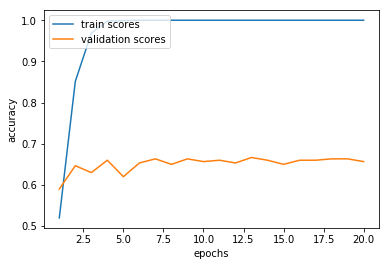

In [12]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
e = np.arange(1, epochs + 1)
plt.plot(e,epoch_train_scores)
plt.plot(e,epoch_test_scores)
plt.legend(['train scores', 'validation scores'], loc='upper left')


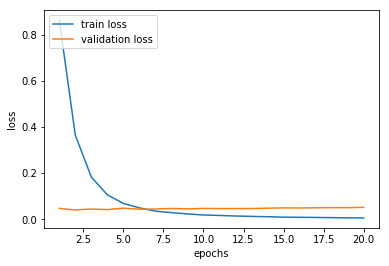

In [13]:
plt.xlabel('epochs')
plt.ylabel('loss')

e = np.arange(1, epochs + 1)
plt.plot(e,epoch_train_losses)
plt.plot(e,epoch_test_losses)
plt.legend(['train loss', 'validation loss'], loc='upper left')